In [48]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import pickle 
import patsy
import seaborn as sns
#from seaborn import plt (alternate)
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import f_regression
from sklearn.cross_validation import cross_val_score
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [519]:
# Read compiled data for regression analysis
yX = pd.read_pickle('data/yX_trans.pkl')

In [512]:
yX = yX[['Prices', 'SingleFamilyResidence', 'Cars_0', 'Cars_1', 'Full_Baths_1', 'Full_Baths_3', 'Sq_Ft', 'Years_Since_Built',
'Days_On_Site', 'HOA', 'Fireplace_b', 'Pool_b', 'Cars_10',
'Cars_12', 'Cars_16', 'Cars_246', 'Cars_35', 'Cars_4', 'Cars_5',
'Cars_6', 'Cars_7', 'Cars_8', 'Cars_9', 'Full_Baths_12',
'Full_Baths_5', 'Full_Baths_6', 'Full_Baths_7', 'Full_Baths_8',
'Full_Baths_9', 'Part_Baths_3', 'Part_Baths_4',
'District_AlamedaCityUnified', 'District_AlamedaUnified',
'District_AlbanyCityUnified', 'District_AlumRockUnionElementary',
'District_BayshoreElementary',
'District_Belmont_RedwoodShoresElementary',
'District_BerryessaUnionElementary', 'District_BrisbaneElementary',
'District_BurlingameElementary', 'District_CabrilloUnified',
'District_CampbellUnionElementary', 'District_CastroValleyUnified',
'District_CupertinoUnion', 'District_DublinUnified',
'District_EastSideUnionHigh', 'District_EmeryUnified',
'District_EvergreenElementary',
'District_Franklin_McKinleyElementary', 'District_FremontUnified',
'District_GilroyUnified', 'District_HaywardUnified',
'District_HillsboroughCityElementary',
'District_JeffersonElementarySanMateo',
'District_LasLomitasElementary',
'District_LivermoreValleyJointUnified',
'District_LosAltosElementary', 'District_LosGatosUnionElementary',
'District_LutherBurbank', 'District_MenloParkCityElementary',
'District_MillbraeElementary', 'District_MilpitasUnified',
'District_MorelandElementary', 'District_MorganHillUnified',
'District_MountainViewWhisman', 'District_MtPleasantElementary',
'District_NewHavenUnified', 'District_NewarkUnified',
'District_OakGroveElementary', 'District_OaklandUnified',
'District_OrchardElementary', 'District_Pacifica',
'District_PaloAltoUnified', 'District_PiedmontCityUnified',
'District_PleasantonUnified', 'District_PortolaValleyElementary',
'District_RavenswoodCityElementary',
'District_RedwoodCityElementary',
'District_SanBrunoParkElementary', 'District_SanCarlosElementary',
'District_SanFranciscoUnified', 'District_SanJoseUnified',
'District_SanLeandroUnified', 'District_SanLorenzoUnified',
'District_SanMateo_FosterCityElementary',
'District_SaratogaUnionElementary',
'District_SouthSanFranciscoUnified', 'District_Sunnyvale',
'District_SunolGlenElementary', 'District_UnionElementary',
'District_WoodsideElementary']]

In [520]:
# X_trans.columns
# X_trans = X_trans[['SingleFamilyResidence','Sq_Ft', 'Years_Since_Built', 'Days_On_Site', 'HOA', 'Fireplace_b', 'Pool_b']]
# yX = yX[['Prices','SingleFamilyResidence','Sq_Ft', 'Years_Since_Built', 'Days_On_Site', 'HOA', 'Fireplace_b', 'Pool_b']]
yX = yX[['Prices', 'SingleFamilyResidence', 'Sq_Ft', 'Years_Since_Built',
'Days_On_Site', 'HOA', 'Fireplace_b', 'District_AlbanyCityUnified', 'District_AlumRockUnionElementary',
'District_Belmont_RedwoodShoresElementary',
'District_BerryessaUnionElementary', 'District_BrisbaneElementary',
'District_BurlingameElementary', 'District_CabrilloUnified',
'District_CampbellUnionElementary', 'District_CastroValleyUnified',
'District_CupertinoUnion', 'District_DublinUnified', 'District_EmeryUnified',
'District_EvergreenElementary', 'District_FremontUnified',
'District_GilroyUnified', 'District_HaywardUnified',
'District_HillsboroughCityElementary',
'District_JeffersonElementarySanMateo',
'District_LasLomitasElementary',
'District_LivermoreValleyJointUnified',
'District_LosAltosElementary', 'District_LosGatosUnionElementary', 'District_MenloParkCityElementary',
'District_MillbraeElementary', 'District_MilpitasUnified',
'District_MorelandElementary', 'District_MorganHillUnified',
'District_MountainViewWhisman', 'District_MtPleasantElementary',
'District_NewHavenUnified', 'District_OrchardElementary', 'District_Pacifica',
'District_PaloAltoUnified', 'District_PiedmontCityUnified',
'District_PleasantonUnified', 'District_PortolaValleyElementary',
'District_RavenswoodCityElementary',
'District_RedwoodCityElementary',
'District_SanBrunoParkElementary', 'District_SanCarlosElementary',
'District_SanFranciscoUnified', 'District_SanJoseUnified',
'District_SanLeandroUnified', 'District_SanLorenzoUnified',
'District_SanMateo_FosterCityElementary',
'District_SaratogaUnionElementary',
'District_SouthSanFranciscoUnified', 'District_Sunnyvale', 'District_UnionElementary',
'District_WoodsideElementary']]

# yX.to_pickle('data/agl_data.pkl')

In [521]:
yX.Prices.mean()

1126296.021320557

In [522]:
# yX[(yX.Prices<150000)|(yX.Prices>100000000)|(yX.Sq_Ft<100)]
# yX[(yX.Prices>10000000)]
yX = yX[(yX.Prices>350000)&(yX.Prices<2500000)&(yX.Sq_Ft>100)&(yX.Sq_Ft<5000)]

In [523]:
# yX.Prices.mean()
yX.shape

(92498, 57)

In [524]:
X = yX.drop('Prices',axis=1)
# intercept = 100000
# y_int = pd.DataFrame({'Intercept': intercept})
# X = X.assign(y_int = lambda x: float(50000))
y = yX['Prices']

In [525]:
# Split test/train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [569]:
from sklearn.metrics import mean_squared_error

# Create your model
model = sm.OLS(y_train, X_train)

# Fit your model to your training set
results = model.fit()
# Print summary statistics of the model's performance
pred = results.predict(X_test)
print('RMSE:',np.power(mean_squared_error(y_test, pred),0.5))
# results.summary()
# print(results.params)
coefs = pd.DataFrame(results.params)
coefs.columns = ['coef']
coefs['coef_abs'] = coefs['coef'].apply(lambda x: abs(x))
coefs.sort_values(['coef_abs'],ascending=False,inplace=True)
coefs
# np.power(results.mse_total,0.5)

# results.mse_model


RMSE: 233557.3079241047


,coef,coef_abs
District_PaloAltoUnified,1.117175e+06,1.117175e+06
District_HillsboroughCityElementary,1.045845e+06,1.045845e+06
District_LosAltosElementary,9.432525e+05,9.432525e+05
District_MenloParkCityElementary,9.322599e+05,9.322599e+05
District_LasLomitasElementary,8.062185e+05,8.062185e+05
District_CupertinoUnion,8.059250e+05,8.059250e+05
District_SaratogaUnionElementary,7.872866e+05,7.872866e+05
District_BurlingameElementary,7.810999e+05,7.810999e+05
District_WoodsideElementary,7.240134e+05,7.240134e+05
District_MountainViewWhisman,7.129977e+05,7.129977e+05


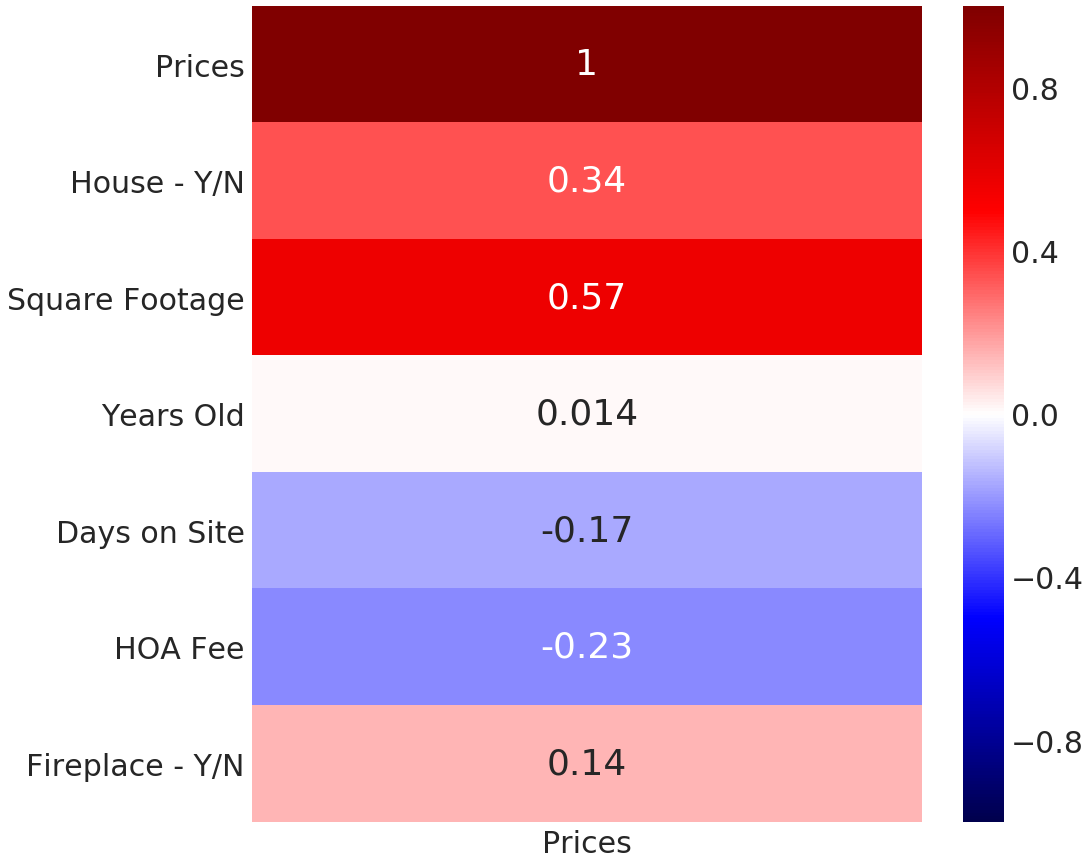

In [566]:
yX_n = yX[['Prices','SingleFamilyResidence','Sq_Ft','Years_Since_Built','Days_On_Site','HOA','Fireplace_b']]
yX_n.columns = ['Prices','House - Y/N','Square Footage','Years Old','Days on Site','HOA Fee','Fireplace - Y/N']
# yX_n.corr()
plt.subplots(figsize=(15,15))
sns.set(font_scale = 3)
sns.heatmap(pd.DataFrame(yX_n.corr()['Prices']), cmap="seismic", annot=True, vmin=-1, vmax=1)

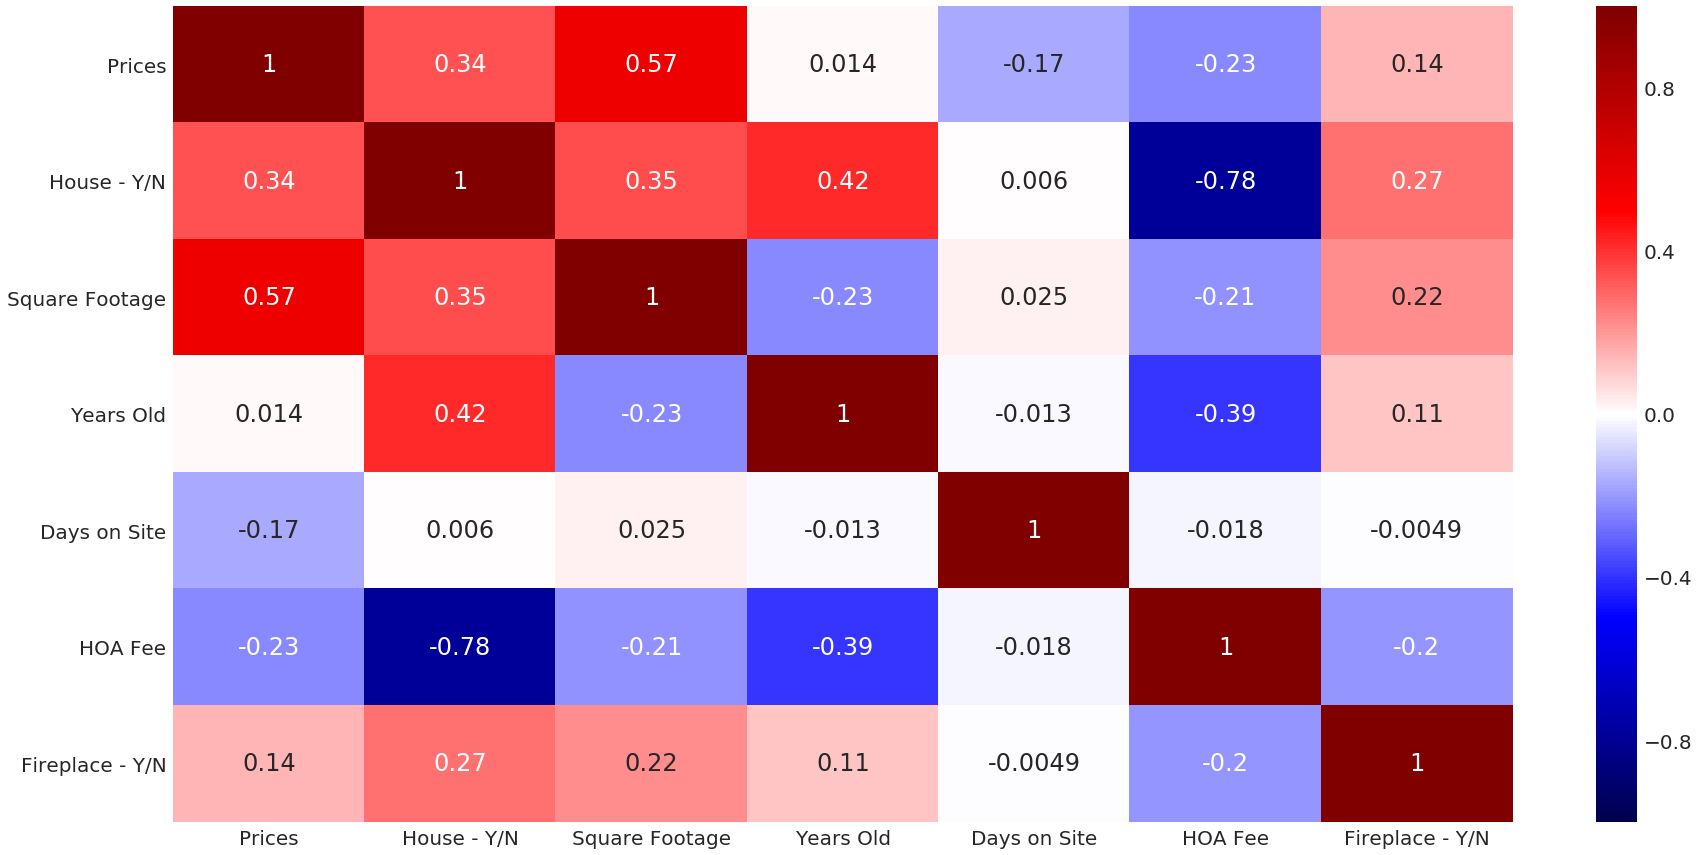

In [485]:
yX_n = yX[['Prices','SingleFamilyResidence','Sq_Ft','Years_Since_Built','Days_On_Site','HOA','Fireplace_b']]
yX_n.columns = ['Prices','House - Y/N','Square Footage','Years Old','Days on Site','HOA Fee','Fireplace - Y/N']
# yX_n.corr()
plt.subplots(figsize=(30,15))
sns.set(font_scale = 2)
sns.heatmap(yX_n.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# yX_d = yX.drop(['SingleFamilyResidence','Sq_Ft','Years_Since_Built','Days_On_Site','HOA','Fireplace_b'],axis=1)
# corr_d = pd.DataFrame(yX_d.corr().Prices).drop('Prices',axis=0)
# corr_d.columns = ['Correlations']
# corr_d['Correlations'].mean()

## Scrap

In [403]:
# Read compiled data for regression analysis
# yX = pd.read_pickle('data/yX_trans.pkl')
# X_train = pd.read_pickle('data/X_train.pkl')
# X_test = pd.read_pickle('data/X_test.pkl')
# y_train = pd.read_pickle('data/y_train.pkl')
# y_test = pd.read_pickle('data/y_test.pkl')
# fts = pd.read_pickle('data/sign_columns.pkl')
# X_trans = pd.read_pickle('data/X_trans.pkl')
# y_trans = pd.read_pickle('data/y_trans.pkl')
# yX = pd.read_pickle('data/yX_trans.pkl')

In [151]:
from sklearn.metrics import mean_squared_error
est = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
est.fit(X_train, y_train)
print(np.power(mean_squared_error(y_train, est.predict(X_train)),0.5))
print(np.power(mean_squared_error(y_test, est.predict(X_test)),0.5))

520357.00244982284
693161.5679487851


In [164]:
# Standardization
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
# print(X_train_std)
# print(X_test_std)

In [ ]:
# Linear Regression on standardized dataset
# import time
# est=LinearRegression()
# est.fit(X_train_std,y_train)
# poly = PolynomialFeatures(2)
# poly.fit_transform(X)
# print(est.score(X_train_std,y_train))

In [ ]:
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
est.fit(X_train, y_train)
train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

In [150]:
# Define the model removing X2 +  X4 +  and X5
lm2 = smf.ols('Prices ~ SingleFamilyResidence + Sq_Ft +  Years_Since_Built +  Days_On_Site +  HOA +  Fireplace_b +  Pool_b', data=yX)

# Fit the model
fit2 = lm2.fit()

# Check out the results
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Prices   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                 1.571e+04
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        01:16:23   Log-Likelihood:            -1.4754e+06
No. Observations:              100185   AIC:                         2.951e+06
Df Residuals:                  100177   BIC:                         2.951e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.883e+04   9792.354      4.986      0.000    2.96e+04     6.8e+04
SingleFamilyResidence -1.462e+05   7592.726    -19.250      0.000   -1.61e+05   -1.31e+05
Sq_Ft                   726.0438      2.516    288.604      0.000     721.113     730.975
Years_Since_Built      5212.3308     87.100     59.843      0.000    5041.616    5383.045
Days_On_Site           -314.9678      5.945    -52.985      0.000    -326.619    -303.317
HOA                     -31.8563     15.329     -2.078      0.038     -61.902      -1.811
Fireplace_b            3.831e+04   5841.460      6.558      0.000    2.69e+04    4.98e+04
Pool_b                -2.814e+05   4089.641    -68.799      0.000   -2.89e+05   -2.73e+05
==============================================================================
Omnibus:                   119322.408   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         64119745.557
Skew:                           5.798   Prob(JB):                         0.00
Kurtosis:                     126.393   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train.shape[1]

In [ ]:
from sklearn.metrics import mean_squared_error

# Step through degrees from 0 to  and store the training and test (generalization) error.
train_error = np.empty(4)
test_error = np.empty(4)
for degree in range(4):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))
# print(train_error)
# print(test_error)

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')

In [ ]:
# model = sm.OLS(y_trans, X_trans)
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),ElasticNet(alpha=1,l1_ratio=.5))
est = pipe.fit(y_trans, X_trans)
# param_grid = {'polynomialfeatures__degree': [1, 2, 3],
#               'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
# grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
# grid.fit(X_train, y_train)

# plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),vmin=0, cmap="viridis")
# plt.xlabel("elasticnet__alpha")
# plt.ylabel("polynomialfeatures__degree")
# plt.xticks(range(len(param_grid['elasticnet__alpha'])), param_grid['elasticnet__alpha'])
# plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),param_grid['polynomialfeatures__degree'])

# plt.colorbar()

In [12]:
X_train.head()

,SingleFamilyResidence,Sq_Ft,Years_Since_Built,Days_On_Site,HOA,Fireplace_b,Pool_b
7149,1,1519.0,46.0,189.0,0.0,1,1
15800,1,1134.0,69.0,428.0,0.0,1,0
37302,0,645.0,28.0,987.0,229.0,1,1
92182,1,920.0,67.0,565.0,0.0,0,0
71116,1,1685.0,99.0,797.0,0.0,1,1


In [11]:
y_train.head()

7149     1000000.0
15800    1090000.0
37302     412000.0
92182     740000.0
71116     659000.0
Name: Prices, dtype: float64

In [14]:
pred = fit.predict(X_test)

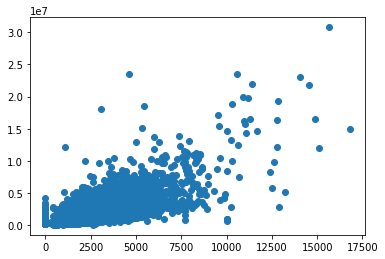

In [30]:
xplot = X_train['Sq_Ft']
plt.scatter(xplot,y_train)

In [15]:
res = y_test-pred

In [17]:
from scipy.stats import normaltest

In [21]:
test = np.log(y_train)

In [20]:
normaltest(np.log(y_test-pred))

NormaltestResult(statistic=nan, pvalue=nan)

(array([1.0000e+00, 3.3200e+02, 2.9405e+04, 2.6800e+02, 3.6000e+01,
        9.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-7004211.66461121, -4054076.57285902, -1103941.48110683,
         1846193.61064535,  4796328.70239754,  7746463.79414973,
        10696598.88590192, 13646733.9776541 , 16596869.06940629,
        19547004.16115848, 22497139.25291067]),
 <a list of 10 Patch objects>)

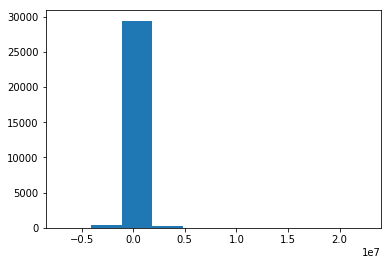

In [16]:
plt.hist(res)

In [ ]:
# Create your model
model = sm.OLS(y_trans, X_trans)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

In [ ]:
kf = KFold(n=len(X_trans), n_folds=5, shuffle=True)

all_scores=[]
alphas=[0, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# alphas = np.linspace(1e-5,0,120)

for train, test in kf:
    x_train=X_trans.iloc[train]
    y_train=y_trans.iloc[train]
    x_test=X_trans.iloc[test]
    y_test=y_trans.iloc[test]
    mse_score=[]
    al = []
    for a in alphas:
        est=Lasso(alpha=a)
        est.fit(x_train,y_train)
        mse=np.mean((y_test-est.predict(x_test))**2)
        mse_score.append(mse)
        al.append(a)
    all_scores.append(mse_score)

for e in all_scores :
    print(e)

# for list in all_scores:
#     plt.scatter(al, mse_score)
#     plt.xlim(alphas[0], alphas[-1])
#     #plt.ylim(min(all_scores), max(all_scores))
# plt.show()

# alpha = 1e-2

# X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.3)

# est=Lasso(alpha=a)
# est.fit(X_train,y_train)
# zipped = zip(X_trans.columns, est.coef_)
# features = sorted(zipped, key=lambda t:t[1], reverse=True)
# [x for x in features if abs(x[1]) > 0.1]

In [ ]:
# lr=LinearRegression()

# lr.fit(X_train, y_train)
# lr.score(X_test, y_test)

alphspace = np.linspace(-100,5000,100)
#rcv = RidgeCV(cv=10,alphas=alphspace, store_cv_values=True)

for a in alphspace:
    #if you change the store_cv_values to True, and cv=None, it shows
    #cv_values_ (its own cross validation values???!?!?!), which 
    #may be the issue...brain melting...
    rcv = RidgeCV(cv=4,alphas=[a], store_cv_values=False)
    rcv.fit(X_train, y_train)
    sc = rcv.score(X_test, y_test)
    #cv = rcv.cv_values_
    print(f'{a} => {sc}')

rcv = RidgeCV(cv=10,alphas=alphspace)
rcv.fit(X_train, y_train)
sc = rcv.score(X_test, y_test) 
print(f'chosen alpha {rcv.alpha_}')



In [ ]:
# data = StandardScaler(X_train)
# fit(data)
# yX = pd.read_pickle('data/X_dst.pkl')

scaler = StandardScaler()
scaler.fit(X_trans)
X_std = scaler.transform(X_trans)
X_std
# sclr = StandardScaler()
# print(sclr.fit(yX))
# StandardScaler(copy=True, with_mean=True, with_std=True)
# print(scaler.mean_)
# print(scaler.transform(data))
# print(scaler.transform([[2, 2]]))


# lr1 = LinearRegression()
# lr1.fit(X_trans, y_train)
# lr1.score(X_trans, y_train)
